In [1]:
import numpy as np
import os
import math
import pandas as pd
from collections import Counter
import itertools

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.svm import SVC

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.optimizers import SGD, Adadelta, Adam
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16

%matplotlib inline

C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from confusion_matrix import print_confusion_matrix

In [3]:
import tensorflow as tf
os.environ["CUDA_VISIBLE_DEVICES"] = '0' #use GPU with ID=0
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5 # maximun alloc gpu50% of MEM
config.gpu_options.allow_growth = True #allocate dynamically
sess = tf.Session(config = config)

In [6]:
main_path_word_emb = "D:/svruchtel/PREPROCESSED_DATA/LSTM_results_word_emb/"
main_path_char_emb = "D:/svruchtel/PREPROCESSED_DATA/LSTM_results_char_emb/"

In [7]:
y_train_word_emb = np.load(main_path_word_emb + "France_ByMeaningLarge_2nd_net_train_y.npy")
y_train_char_emb = np.load(main_path_char_emb + "France_ByMeaningLarge_1st_net_train_y.npy")

y_test_word_emb = np.load(main_path_word_emb + "France_ByMeaningLarge_2nd_net_test_y.npy")
y_test_char_emb = np.load(main_path_char_emb + "France_ByMeaningLarge_1st_net_test_y.npy")

In [8]:
y_train = y_train_word_emb
y_test = y_test_word_emb

In [9]:
# print(y_test_word_emb.shape)
# print(y_test_char_emb.shape)

In [10]:
# for idx in range(len(y_train_2nd_net_word_emb)):
#     if y_train_2nd_net_word_emb[0].any() != y_train_3rd_net_word_emb[0].any():
#         print("problem")

In [11]:
# for idx in range(len(y_train_word_emb)):
#     if y_train_word_emb[0].any() != y_train_word_emb[0].any():
#         print("problem")

In [12]:
# let's load what we need
X_train_2nd_net_word_emb = np.load(main_path_word_emb + "France_ByMeaningLarge_2nd_net_train_X.npy")
X_train_3rd_net_word_emb = np.load(main_path_word_emb + "France_ByMeaningLarge_3rd_net_train_X.npy")
X_train_4th_net_word_emb = np.load(main_path_word_emb + "France_ByMeaningLarge_4th_net_train_X.npy")

X_test_2nd_net_word_emb = np.load(main_path_word_emb + "France_ByMeaningLarge_2nd_net_test_X.npy")
X_test_3rd_net_word_emb = np.load(main_path_word_emb + "France_ByMeaningLarge_3rd_net_test_X.npy")
X_test_4th_net_word_emb = np.load(main_path_word_emb + "France_ByMeaningLarge_4th_net_test_X.npy")

X_train_3rd_net_char_emb = np.load(main_path_char_emb + "France_ByMeaningLarge_3rd_net_train_X_100_chars_GLOVE_FR.npy")
X_train_4th_net_char_emb = np.load(main_path_char_emb + "France_ByMeaningLarge_4th_net_train_X_100_chars_GLOVE_FR.npy")

X_test_3rd_net_char_emb = np.load(main_path_char_emb + "France_ByMeaningLarge_3rd_net_test_X_100_chars_GLOVE_FR.npy")
X_test_4th_net_char_emb = np.load(main_path_char_emb + "France_ByMeaningLarge_4th_net_test_X_100_chars_GLOVE_FR.npy")

In [13]:
CATEGORIES_COUNT = 2

In [14]:
X_train_2_3 = np.concatenate((X_train_2nd_net_word_emb, X_train_3rd_net_char_emb), axis=1)
X_test_2_3 = np.concatenate((X_test_2nd_net_word_emb, X_test_3rd_net_char_emb), axis=1)

X_train_2_4 = np.concatenate((X_train_2nd_net_word_emb, X_train_4th_net_char_emb), axis=1)
X_test_2_4 = np.concatenate((X_test_2nd_net_word_emb, X_test_4th_net_char_emb), axis=1)

X_train_3_3 = np.concatenate((X_train_3rd_net_word_emb, X_train_3rd_net_char_emb), axis=1)
X_test_3_3 = np.concatenate((X_test_3rd_net_word_emb, X_test_3rd_net_char_emb), axis=1)

X_train_3_4 = np.concatenate((X_train_3rd_net_word_emb, X_train_4th_net_char_emb), axis=1)
X_test_3_4 = np.concatenate((X_test_3rd_net_word_emb, X_test_4th_net_char_emb), axis=1)

X_train_4_3 = np.concatenate((X_train_4th_net_word_emb, X_train_3rd_net_char_emb), axis=1)
X_test_4_3 = np.concatenate((X_test_4th_net_word_emb, X_test_3rd_net_char_emb), axis=1)

X_train_4_4 = np.concatenate((X_train_4th_net_word_emb, X_train_4th_net_char_emb), axis=1)
X_test_4_4 = np.concatenate((X_test_4th_net_word_emb, X_test_4th_net_char_emb), axis=1)

## knn_uniform

#### 2_word, 3_char

test accuracy:  0.7982

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1575  154]
 [ 136 1112]]
Normalized confusion matrix
[[0.91093117 0.08906883]
 [0.10897436 0.89102564]]


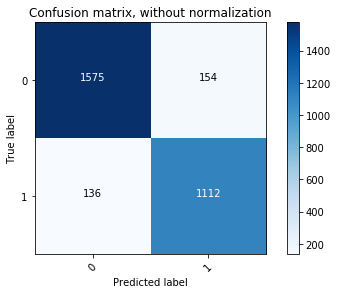

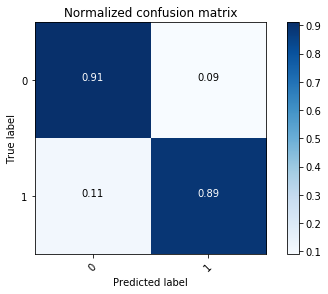


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[154  39]
 [ 28 111]]
Normalized confusion matrix
[[0.79792746 0.20207254]
 [0.20143885 0.79856115]]


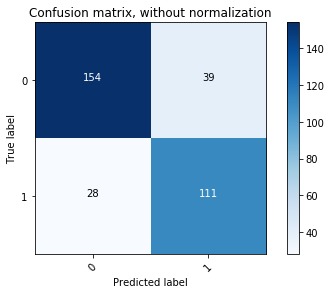

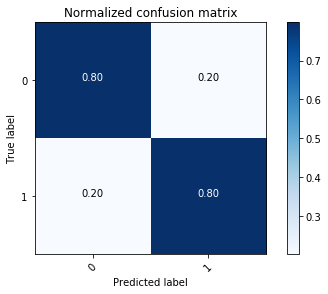

In [13]:
X_train = X_train_2_3
X_test = X_test_2_3

knn_uniform_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_uniform_15.fit(X_train, y_train)

acc_knn_uniform_15 = accuracy_score(y_test, knn_uniform_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_uniform_15)
print("")

y_train_pred = (knn_uniform_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_uniform_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)


#### 2 word, 4 char

test accuracy:  0.7651

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1533  196]
 [ 132 1116]]
Normalized confusion matrix
[[0.88663968 0.11336032]
 [0.10576923 0.89423077]]


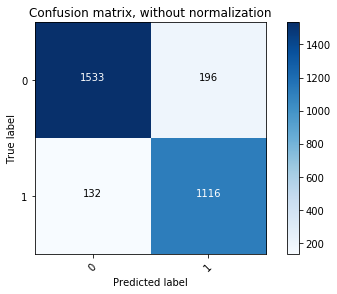

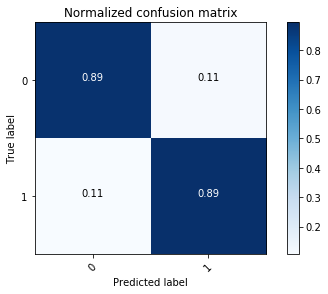


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[141  52]
 [ 26 113]]
Normalized confusion matrix
[[0.73056995 0.26943005]
 [0.18705036 0.81294964]]


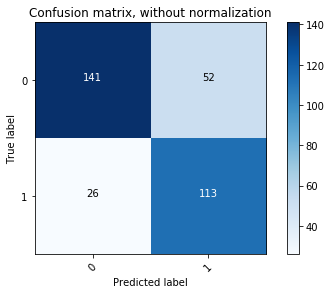

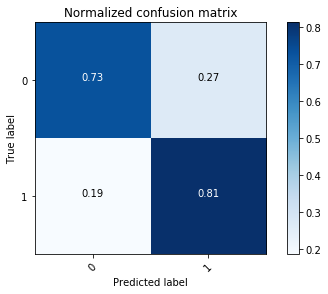

In [15]:
X_train = X_train_2_4
X_test = X_test_2_4

knn_uniform_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_uniform_15.fit(X_train, y_train)

acc_knn_uniform_15 = accuracy_score(y_test, knn_uniform_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_uniform_15)
print("")

y_train_pred = (knn_uniform_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_uniform_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 3 word, 3 char

test accuracy:  0.8042

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1601  128]
 [ 144 1104]]
Normalized confusion matrix
[[0.92596877 0.07403123]
 [0.11538462 0.88461538]]


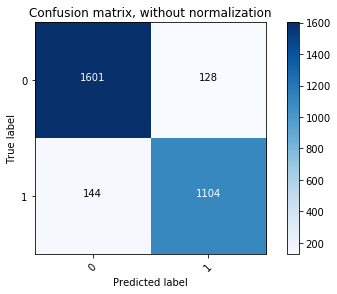

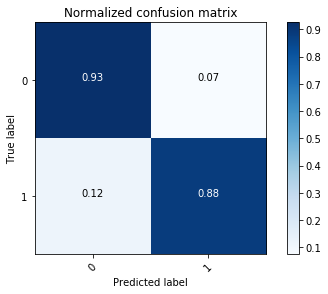


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[157  36]
 [ 29 110]]
Normalized confusion matrix
[[0.8134715  0.1865285 ]
 [0.20863309 0.79136691]]


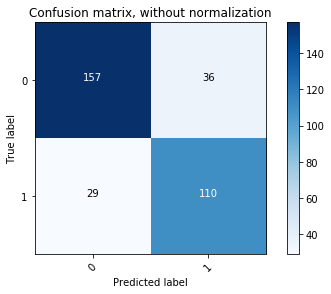

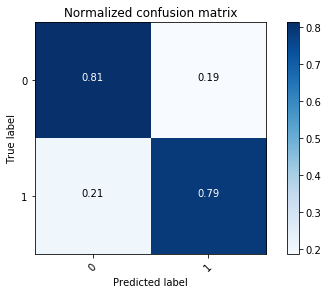

In [16]:
X_train = X_train_3_3
X_test = X_test_3_3

knn_uniform_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_uniform_15.fit(X_train, y_train)

acc_knn_uniform_15 = accuracy_score(y_test, knn_uniform_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_uniform_15)
print("")

y_train_pred = (knn_uniform_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_uniform_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 3 word, 4 char

test accuracy:  0.7620

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1548  181]
 [ 151 1097]]
Normalized confusion matrix
[[0.89531521 0.10468479]
 [0.12099359 0.87900641]]


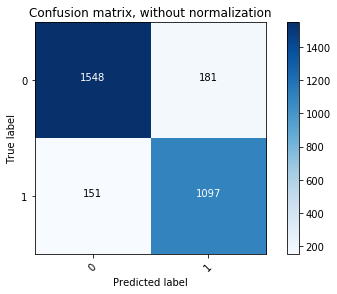

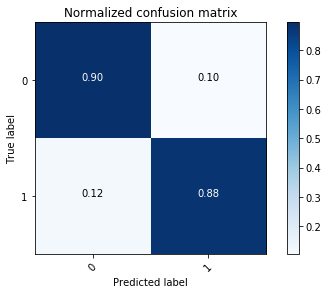


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[142  51]
 [ 28 111]]
Normalized confusion matrix
[[0.7357513  0.2642487 ]
 [0.20143885 0.79856115]]


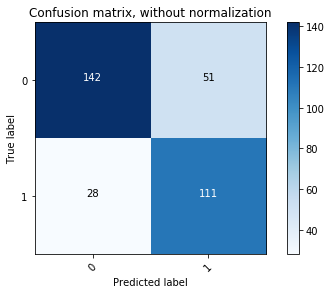

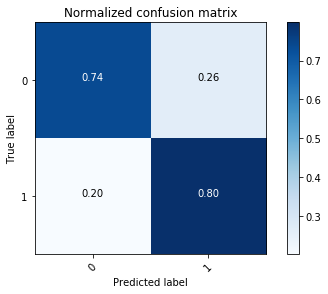

In [17]:
X_train = X_train_3_4
X_test = X_test_3_4

knn_uniform_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_uniform_15.fit(X_train, y_train)

acc_knn_uniform_15 = accuracy_score(y_test, knn_uniform_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_uniform_15)
print("")

y_train_pred = (knn_uniform_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_uniform_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 4 word, 3 char

test accuracy:  0.8012

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1585  144]
 [ 139 1109]]
Normalized confusion matrix
[[0.91671486 0.08328514]
 [0.11137821 0.88862179]]


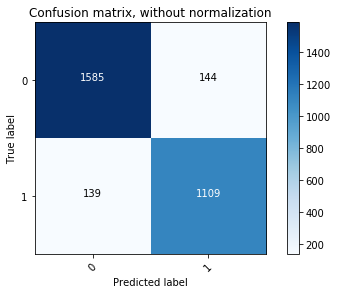

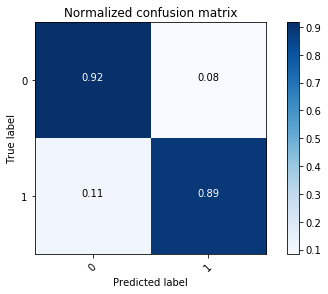


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[157  36]
 [ 30 109]]
Normalized confusion matrix
[[0.8134715  0.1865285 ]
 [0.21582734 0.78417266]]


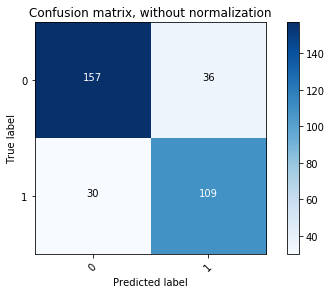

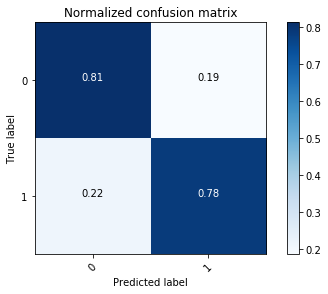

In [18]:
X_train = X_train_4_3
X_test = X_test_4_3

knn_uniform_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_uniform_15.fit(X_train, y_train)

acc_knn_uniform_15 = accuracy_score(y_test, knn_uniform_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_uniform_15)
print("")

y_train_pred = (knn_uniform_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_uniform_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 4 word, 4 char

test accuracy:  0.7651

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1540  189]
 [ 143 1105]]
Normalized confusion matrix
[[0.89068826 0.10931174]
 [0.11458333 0.88541667]]


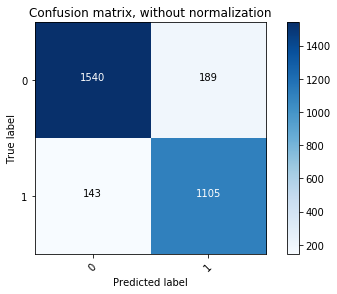

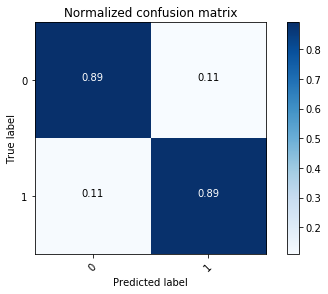


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[142  51]
 [ 27 112]]
Normalized confusion matrix
[[0.7357513 0.2642487]
 [0.1942446 0.8057554]]


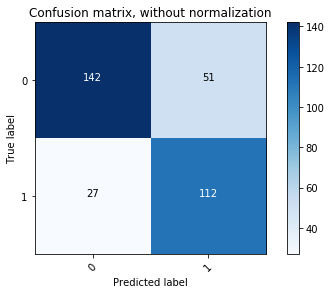

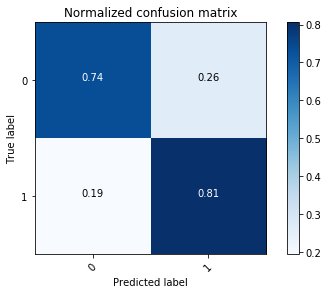

In [19]:
X_train = X_train_4_4
X_test = X_test_4_4

knn_uniform_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_uniform_15.fit(X_train, y_train)

acc_knn_uniform_15 = accuracy_score(y_test, knn_uniform_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_uniform_15)
print("")

y_train_pred = (knn_uniform_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_uniform_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

### knn_distance

#### 2 word, 3 char

test accuracy:  0.7741

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1729    0]
 [   0 1248]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


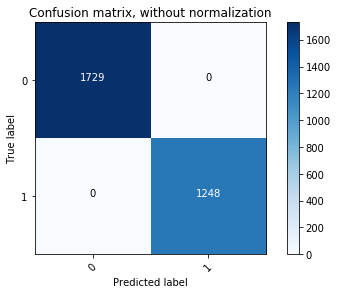

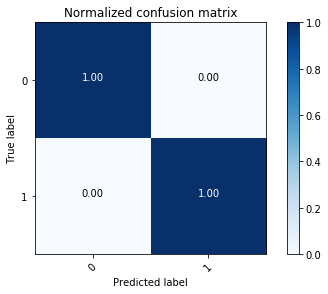


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[150  43]
 [ 32 107]]
Normalized confusion matrix
[[0.77720207 0.22279793]
 [0.23021583 0.76978417]]


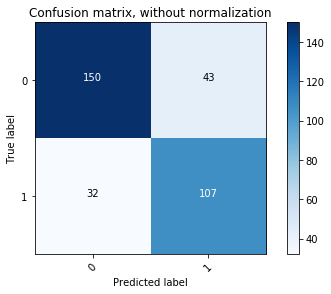

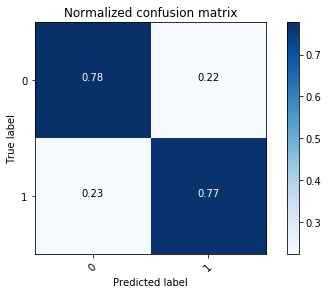

In [23]:
X_train = X_train_2_3
X_test = X_test_2_3

knn_distance_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_distance_15.fit(X_train, y_train)

acc_knn_distance_15 = accuracy_score(y_test, knn_distance_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_distance_15)
print("")

y_train_pred = (knn_distance_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_distance_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 2 word, 4 char

test accuracy:  0.7440

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1729    0]
 [   0 1248]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


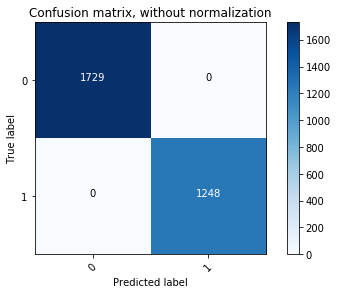

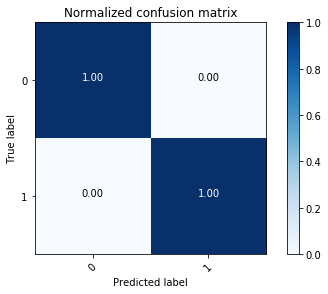


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[142  51]
 [ 34 105]]
Normalized confusion matrix
[[0.7357513  0.2642487 ]
 [0.24460432 0.75539568]]


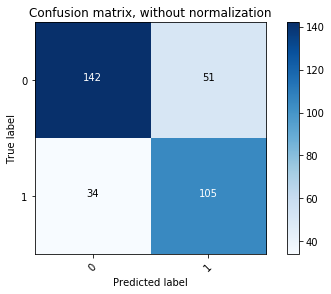

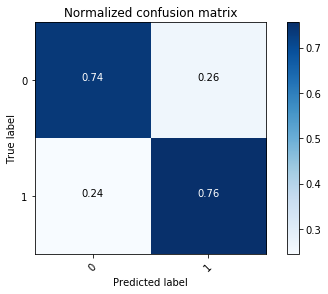

In [24]:
X_train = X_train_2_4
X_test = X_test_2_4

knn_distance_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_distance_15.fit(X_train, y_train)

acc_knn_distance_15 = accuracy_score(y_test, knn_distance_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_distance_15)
print("")

y_train_pred = (knn_distance_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_distance_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 3 word, 3 char

test accuracy:  0.7861

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1729    0]
 [   0 1248]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


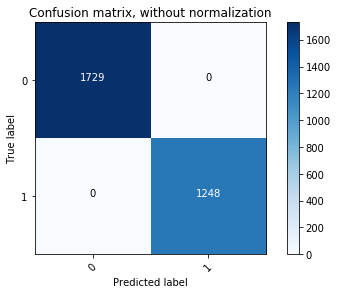

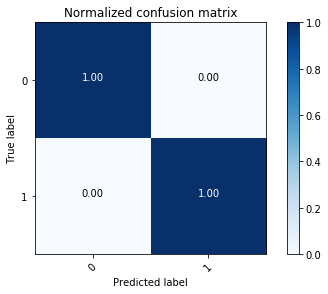


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[152  41]
 [ 30 109]]
Normalized confusion matrix
[[0.78756477 0.21243523]
 [0.21582734 0.78417266]]


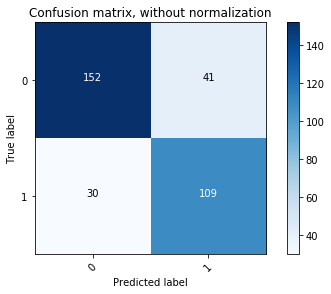

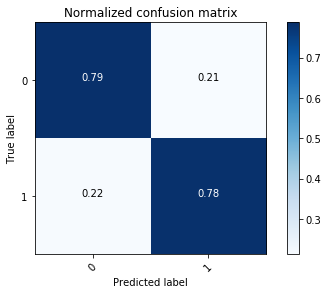

In [25]:
X_train = X_train_3_3
X_test = X_test_3_3

knn_distance_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_distance_15.fit(X_train, y_train)

acc_knn_distance_15 = accuracy_score(y_test, knn_distance_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_distance_15)
print("")

y_train_pred = (knn_distance_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_distance_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 3 word, 4 char

test accuracy:  0.7620

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1729    0]
 [   0 1248]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


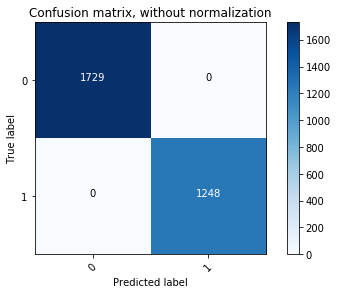

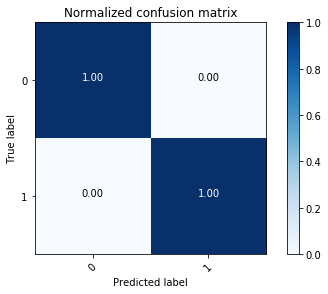


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[144  49]
 [ 30 109]]
Normalized confusion matrix
[[0.74611399 0.25388601]
 [0.21582734 0.78417266]]


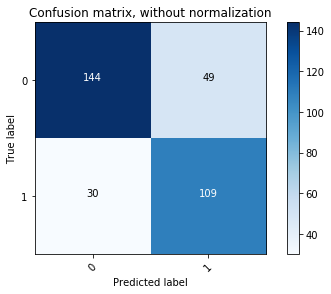

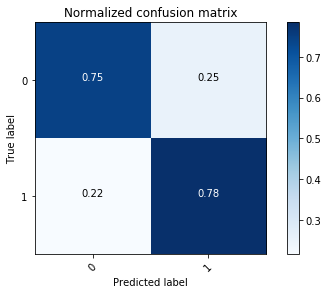

In [26]:
X_train = X_train_3_4
X_test = X_test_3_4

knn_distance_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_distance_15.fit(X_train, y_train)

acc_knn_distance_15 = accuracy_score(y_test, knn_distance_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_distance_15)
print("")

y_train_pred = (knn_distance_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_distance_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 4 word, 3 char

test accuracy:  0.7771

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1729    0]
 [   0 1248]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


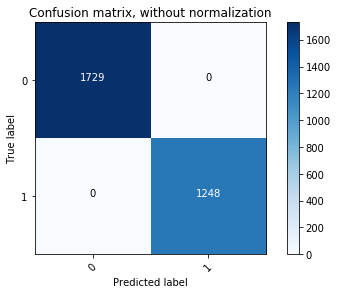

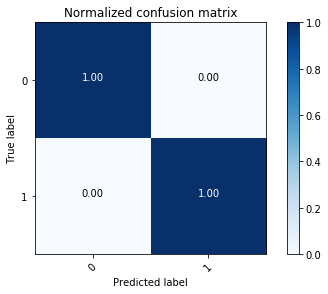


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[152  41]
 [ 33 106]]
Normalized confusion matrix
[[0.78756477 0.21243523]
 [0.23741007 0.76258993]]


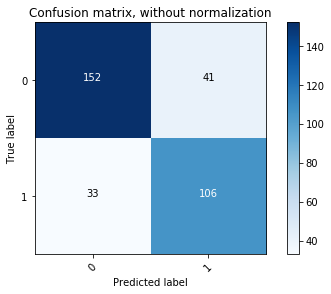

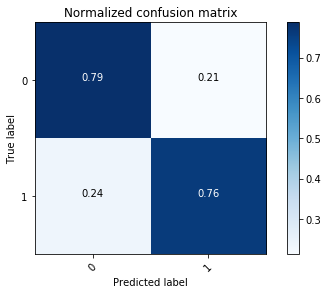

In [27]:
X_train = X_train_4_3
X_test = X_test_4_3

knn_distance_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_distance_15.fit(X_train, y_train)

acc_knn_distance_15 = accuracy_score(y_test, knn_distance_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_distance_15)
print("")

y_train_pred = (knn_distance_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_distance_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 4 word, 4 char

test accuracy:  0.7380

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1729    0]
 [   0 1248]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


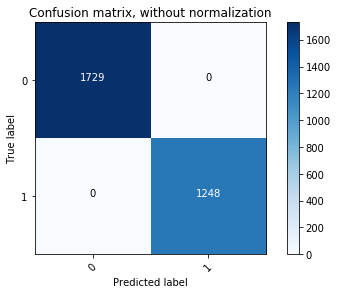

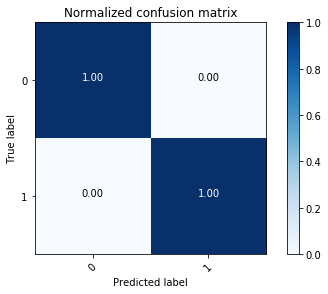


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[141  52]
 [ 35 104]]
Normalized confusion matrix
[[0.73056995 0.26943005]
 [0.25179856 0.74820144]]


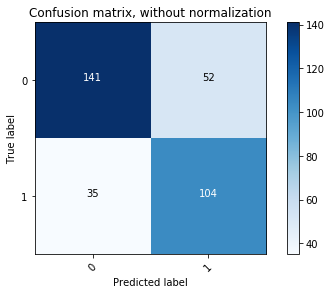

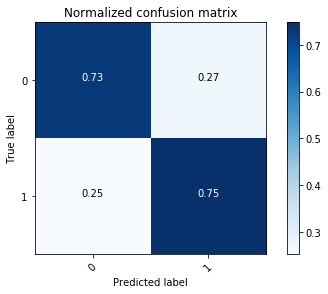

In [28]:
X_train = X_train_4_4
X_test = X_test_4_4

knn_distance_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_distance_15.fit(X_train, y_train)

acc_knn_distance_15 = accuracy_score(y_test, knn_distance_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_distance_15)
print("")

y_train_pred = (knn_distance_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_distance_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

### SVM

#### 2 word, 3 char

test accuracy:  0.7952

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1552  177]
 [ 124 1124]]
Normalized confusion matrix
[[0.89762869 0.10237131]
 [0.09935897 0.90064103]]


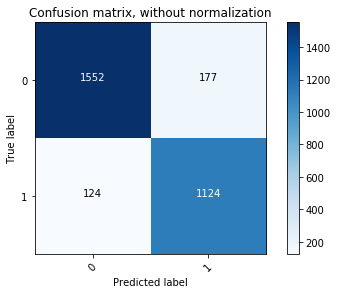

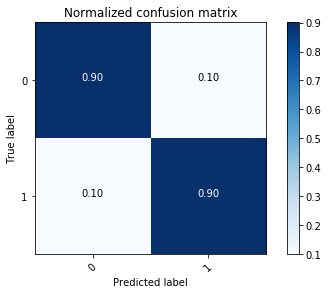


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[150  43]
 [ 25 114]]
Normalized confusion matrix
[[0.77720207 0.22279793]
 [0.17985612 0.82014388]]


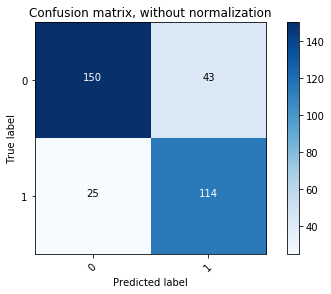

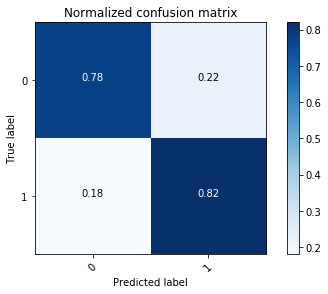

In [29]:
X_train = X_train_2_3
X_test = X_test_2_3

svm = SVC(kernel='rbf')
svm.fit(X_train, (y_train.round()).argmax(axis=1))

acc_svm = accuracy_score((y_test.round()).argmax(axis=1), svm.predict(X_test))
print("test accuracy:  %.4f" % acc_svm)
print("")

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

#### 2 word, 4 char

test accuracy:  0.7741

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1504  225]
 [ 144 1104]]
Normalized confusion matrix
[[0.86986698 0.13013302]
 [0.11538462 0.88461538]]


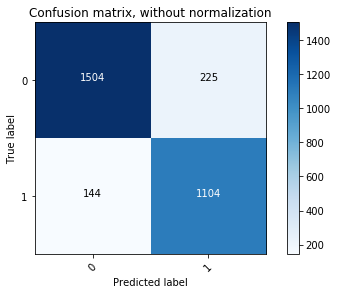

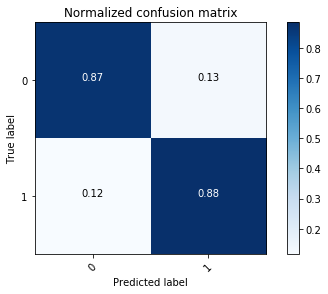


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[141  52]
 [ 23 116]]
Normalized confusion matrix
[[0.73056995 0.26943005]
 [0.16546763 0.83453237]]


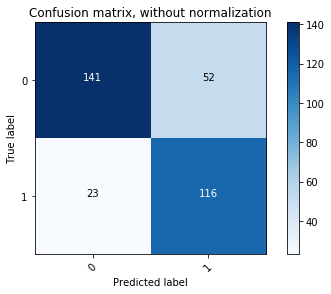

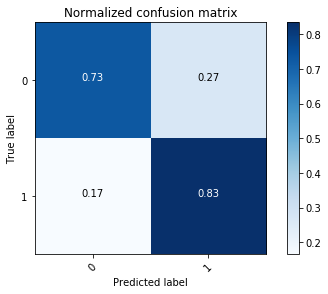

In [30]:
X_train = X_train_2_4
X_test = X_test_2_4

svm = SVC(kernel='rbf')
svm.fit(X_train, (y_train.round()).argmax(axis=1))

acc_svm = accuracy_score((y_test.round()).argmax(axis=1), svm.predict(X_test))
print("test accuracy:  %.4f" % acc_svm)
print("")

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

#### 3 word, 3 char

test accuracy:  0.7952

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1554  175]
 [ 125 1123]]
Normalized confusion matrix
[[0.89878543 0.10121457]
 [0.10016026 0.89983974]]


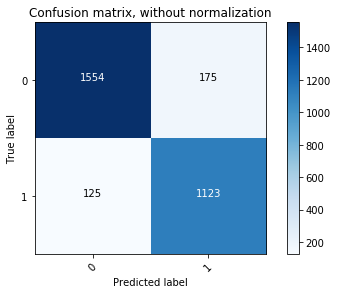

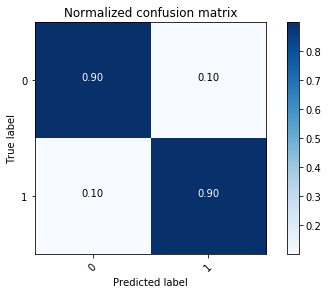


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[150  43]
 [ 25 114]]
Normalized confusion matrix
[[0.77720207 0.22279793]
 [0.17985612 0.82014388]]


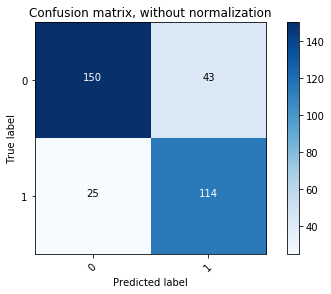

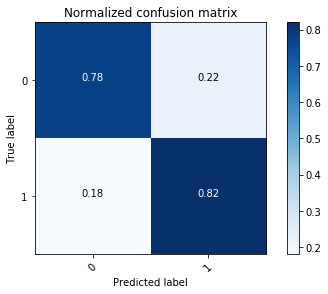

In [31]:
X_train = X_train_3_3
X_test = X_test_3_3

svm = SVC(kernel='rbf')
svm.fit(X_train, (y_train.round()).argmax(axis=1))

acc_svm = accuracy_score((y_test.round()).argmax(axis=1), svm.predict(X_test))
print("test accuracy:  %.4f" % acc_svm)
print("")

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

#### 3 word, 4 char

test accuracy:  0.7741

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1507  222]
 [ 146 1102]]
Normalized confusion matrix
[[0.87160208 0.12839792]
 [0.11698718 0.88301282]]


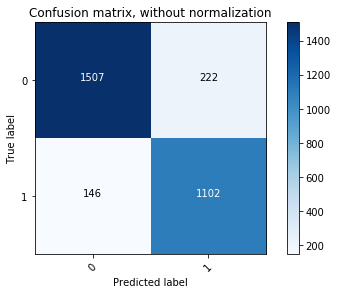

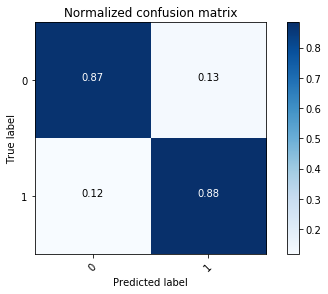


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[141  52]
 [ 23 116]]
Normalized confusion matrix
[[0.73056995 0.26943005]
 [0.16546763 0.83453237]]


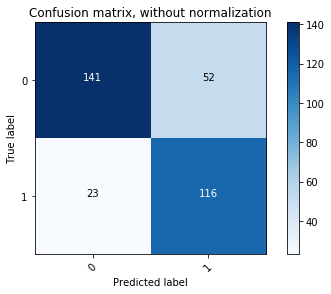

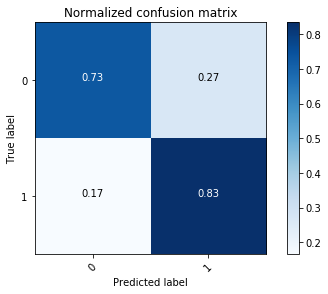

In [32]:
X_train = X_train_3_4
X_test = X_test_3_4

svm = SVC(kernel='rbf')
svm.fit(X_train, (y_train.round()).argmax(axis=1))

acc_svm = accuracy_score((y_test.round()).argmax(axis=1), svm.predict(X_test))
print("test accuracy:  %.4f" % acc_svm)
print("")

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

#### 4 word, 3 char

test accuracy:  0.7952

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1553  176]
 [ 125 1123]]
Normalized confusion matrix
[[0.89820706 0.10179294]
 [0.10016026 0.89983974]]


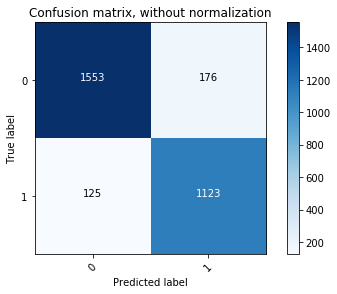

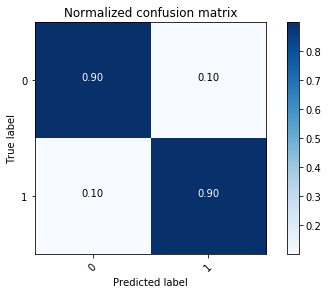


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[150  43]
 [ 25 114]]
Normalized confusion matrix
[[0.77720207 0.22279793]
 [0.17985612 0.82014388]]


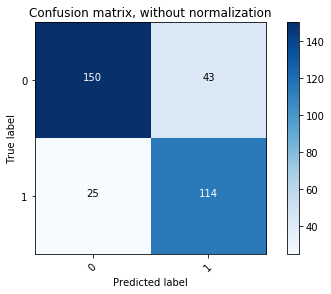

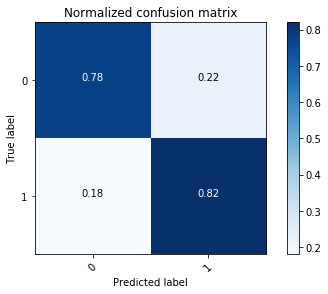

In [33]:
X_train = X_train_4_3
X_test = X_test_4_3

svm = SVC(kernel='rbf')
svm.fit(X_train, (y_train.round()).argmax(axis=1))

acc_svm = accuracy_score((y_test.round()).argmax(axis=1), svm.predict(X_test))
print("test accuracy:  %.4f" % acc_svm)
print("")

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

#### 4 word, 4 char

test accuracy:  0.7741

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1504  225]
 [ 146 1102]]
Normalized confusion matrix
[[0.86986698 0.13013302]
 [0.11698718 0.88301282]]


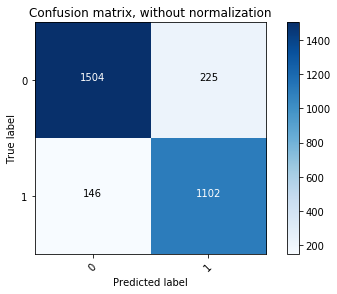

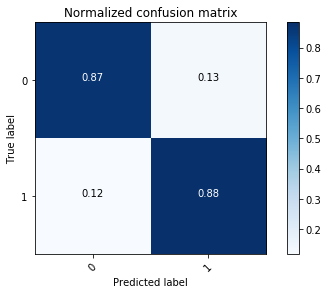


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[141  52]
 [ 23 116]]
Normalized confusion matrix
[[0.73056995 0.26943005]
 [0.16546763 0.83453237]]


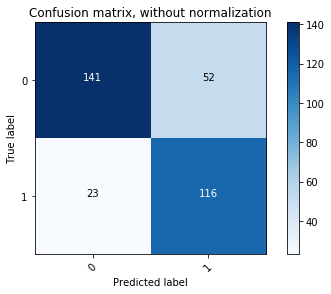

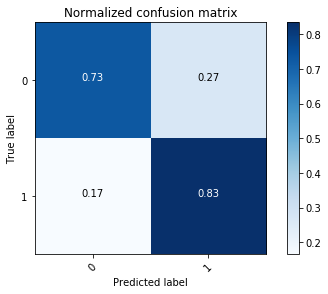

In [34]:
X_train = X_train_4_4
X_test = X_test_4_4

svm = SVC(kernel='rbf')
svm.fit(X_train, (y_train.round()).argmax(axis=1))

acc_svm = accuracy_score((y_test.round()).argmax(axis=1), svm.predict(X_test))
print("test accuracy:  %.4f" % acc_svm)
print("")

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

### meta_net

#### 2 word, 3 char

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               2560      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 514       
Total params: 134,402
Trainable params: 134,402
Non-trainable params: 0
_________________________________________________________________
None
Train on 2977 samples, validate on 332 samples
Epoch 1/300
2977/2977 [==============================] - 1s 283us/step - loss: 0.311

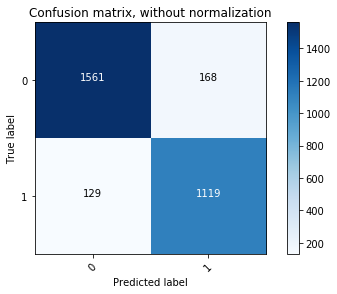

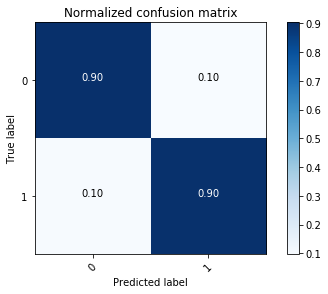


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[152  41]
 [ 27 112]]
Normalized confusion matrix
[[0.78756477 0.21243523]
 [0.1942446  0.8057554 ]]


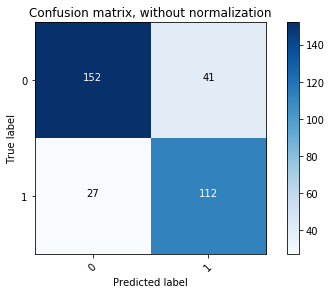

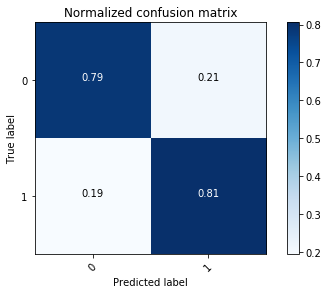

Wall time: 5.68 s


In [36]:
%%time
categories_count = CATEGORIES_COUNT

X_train = X_train_2_3
X_test = X_test_2_3

meta_net = Sequential()
meta_net.add(Dense(512, input_shape=X_train[0].shape))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(256))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(categories_count, activation='softmax'))
meta_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(meta_net.summary())
    
callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto')
history_callback = meta_net.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=300, batch_size=100, callbacks=[callback])

test_scores = meta_net.evaluate(X_test, y_test, verbose=0)
    
print("test accuracy:  %.4f" % test_scores[1])
print("")

y_train_pred = (meta_net.predict(X_train).round()).argmax(axis=1)
y_test_pred = (meta_net.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

# and than write results info files
file_path_train = "./Stacking_Results_France_ByMeaningLarge/meta_net_train_2_3_GLOVE_FR.npy"
file_path_test = "./Stacking_Results_France_ByMeaningLarge/meta_net_test_2_3_GLOVE_FR.npy"

np.save(file_path_train, y_train_pred)
np.save(file_path_test, y_test_pred)

#### 2 word, 4 char

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               2560      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 514       
Total params: 134,402
Trainable params: 134,402
Non-trainable params: 0
_________________________________________________________________
None
Train on 2977 samples, validate on 332 samples
Epoch 1/300
2977/2977 [==============================] - 1s 247us/step - loss: 0.338

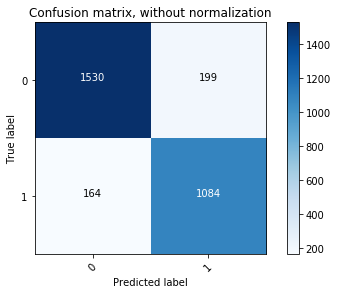

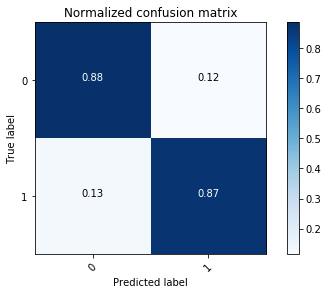


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[142  51]
 [ 26 113]]
Normalized confusion matrix
[[0.7357513  0.2642487 ]
 [0.18705036 0.81294964]]


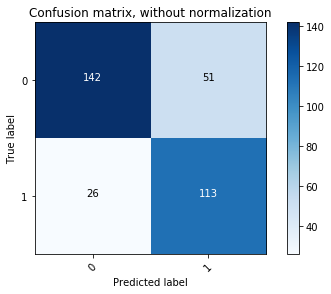

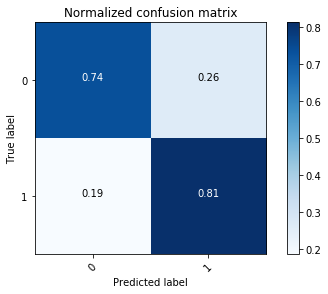

Wall time: 6.18 s


In [37]:
%%time
categories_count = CATEGORIES_COUNT

X_train = X_train_2_4
X_test = X_test_2_4

meta_net = Sequential()
meta_net.add(Dense(512, input_shape=X_train[0].shape))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(256))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(categories_count, activation='softmax'))
meta_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(meta_net.summary())
    
callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto')
history_callback = meta_net.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=300, batch_size=100, callbacks=[callback])

test_scores = meta_net.evaluate(X_test, y_test, verbose=0)
    
print("test accuracy:  %.4f" % test_scores[1])
print("")

y_train_pred = (meta_net.predict(X_train).round()).argmax(axis=1)
y_test_pred = (meta_net.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

# and than write results info files
file_path_train = "./Stacking_Results_France_ByMeaningLarge/meta_net_train_2_4_GLOVE_FR.npy"
file_path_test = "./Stacking_Results_France_ByMeaningLarge/meta_net_test_2_4_GLOVE_FR.npy"

np.save(file_path_train, y_train_pred)
np.save(file_path_test, y_test_pred)

#### 3 word, 3 char

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               2560      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 514       
Total params: 134,402
Trainable params: 134,402
Non-trainable params: 0
_________________________________________________________________
None
Train on 2977 samples, validate on 332 samples
Epoch 1/300
2977/2977 [==============================] - 1s 483us/step - loss: 0.309

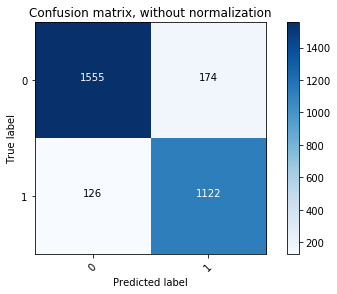

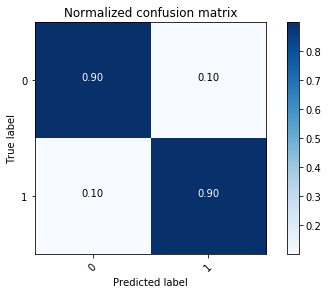


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[150  43]
 [ 25 114]]
Normalized confusion matrix
[[0.77720207 0.22279793]
 [0.17985612 0.82014388]]


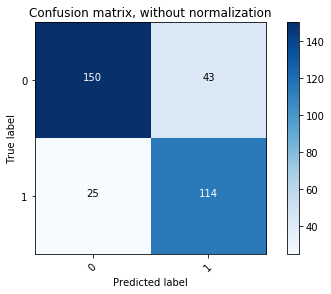

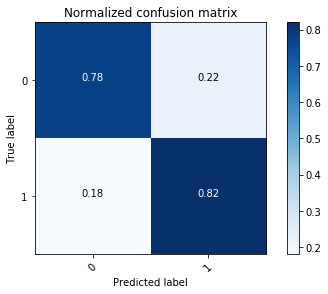

Wall time: 11.1 s


In [16]:
%%time
categories_count = CATEGORIES_COUNT

X_train = X_train_3_3
X_test = X_test_3_3

meta_net = Sequential()
meta_net.add(Dense(512, input_shape=X_train[0].shape))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(256))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(categories_count, activation='softmax'))
meta_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(meta_net.summary())
    
callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto')
history_callback = meta_net.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=300, batch_size=100, callbacks=[callback])

test_scores = meta_net.evaluate(X_test, y_test, verbose=0)
    
print("test accuracy:  %.4f" % test_scores[1])
print("")

y_train_pred = (meta_net.predict(X_train).round()).argmax(axis=1)
y_test_pred = (meta_net.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

# and than write results info files
file_path_train = "./Stacking_Results_France_ByMeaningLarge/meta_net_train_3_3_GLOVE_FR.npy"
file_path_test = "./Stacking_Results_France_ByMeaningLarge/meta_net_test_3_3_GLOVE_FR.npy"

np.save(file_path_train, y_train_pred)
np.save(file_path_test, y_test_pred)

#### 3 word, 4 char

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               2560      
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 514       
Total params: 134,402
Trainable params: 134,402
Non-trainable params: 0
_________________________________________________________________
None
Train on 2977 samples, validate on 332 samples
Epoch 1/300
2977/2977 [==============================] - 1s 291us/step - loss: 0.348

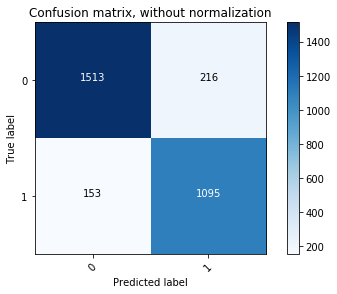

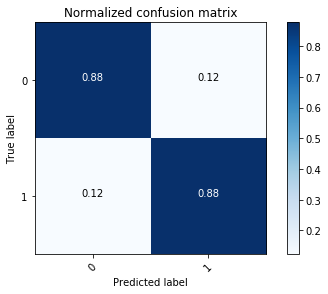


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[141  52]
 [ 24 115]]
Normalized confusion matrix
[[0.73056995 0.26943005]
 [0.17266187 0.82733813]]


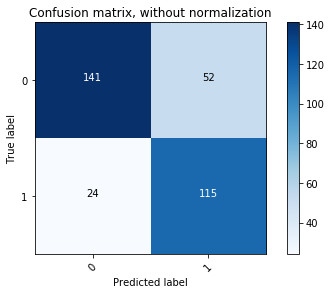

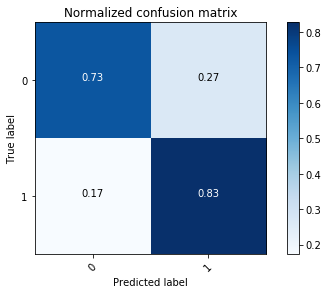

Wall time: 4.74 s


In [40]:
%%time
categories_count = CATEGORIES_COUNT

X_train = X_train_3_4
X_test = X_test_3_4

meta_net = Sequential()
meta_net.add(Dense(512, input_shape=X_train[0].shape))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(256))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(categories_count, activation='softmax'))
meta_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(meta_net.summary())
    
callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto')
history_callback = meta_net.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=300, batch_size=100, callbacks=[callback])

test_scores = meta_net.evaluate(X_test, y_test, verbose=0)
    
print("test accuracy:  %.4f" % test_scores[1])
print("")

y_train_pred = (meta_net.predict(X_train).round()).argmax(axis=1)
y_test_pred = (meta_net.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

# and than write results info files
file_path_train = "./Stacking_Results_France_ByMeaningLarge/meta_net_train_3_4_GLOVE_FR.npy"
file_path_test = "./Stacking_Results_France_ByMeaningLarge/meta_net_test_3_4_GLOVE_FR.npy"

np.save(file_path_train, y_train_pred)
np.save(file_path_test, y_test_pred)

#### 4 word, 3 char

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               2560      
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 514       
Total params: 134,402
Trainable params: 134,402
Non-trainable params: 0
_________________________________________________________________
None
Train on 2977 samples, validate on 332 samples
Epoch 1/300
2977/2977 [==============================] - 1s 282us/step - loss: 0.319

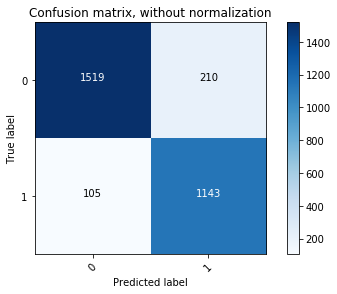

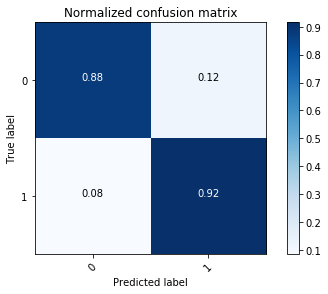


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[150  43]
 [ 24 115]]
Normalized confusion matrix
[[0.77720207 0.22279793]
 [0.17266187 0.82733813]]


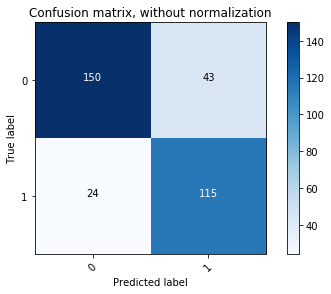

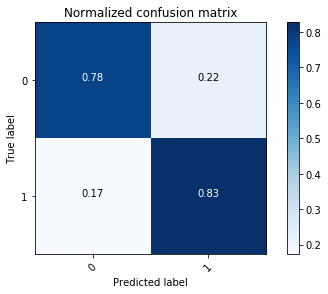

Wall time: 6.65 s


In [41]:
%%time
categories_count = CATEGORIES_COUNT

X_train = X_train_4_3
X_test = X_test_4_3

meta_net = Sequential()
meta_net.add(Dense(512, input_shape=X_train[0].shape))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(256))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(categories_count, activation='softmax'))
meta_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(meta_net.summary())
    
callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto')
history_callback = meta_net.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=300, batch_size=100, callbacks=[callback])

test_scores = meta_net.evaluate(X_test, y_test, verbose=0)
    
print("test accuracy:  %.4f" % test_scores[1])
print("")

y_train_pred = (meta_net.predict(X_train).round()).argmax(axis=1)
y_test_pred = (meta_net.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

# and than write results info files
file_path_train = "./Stacking_Results_France_ByMeaningLarge/meta_net_train_4_3_GLOVE_FR.npy"
file_path_test = "./Stacking_Results_France_ByMeaningLarge/meta_net_test_4_3_GLOVE_FR.npy"

np.save(file_path_train, y_train_pred)
np.save(file_path_test, y_test_pred)

#### 4 word, 4 char

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               2560      
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 514       
Total params: 134,402
Trainable params: 134,402
Non-trainable params: 0
_________________________________________________________________
None
Train on 2977 samples, validate on 332 samples
Epoch 1/300
2977/2977 [==============================] - 1s 301us/step - loss: 0.351

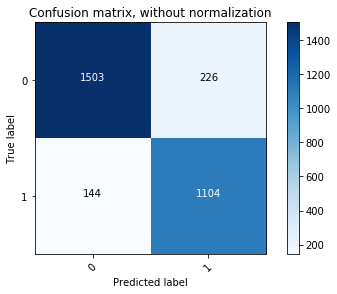

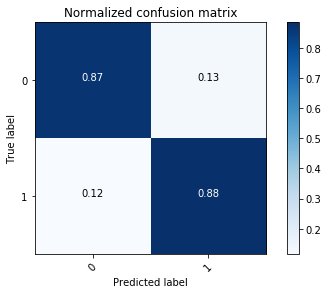


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[141  52]
 [ 23 116]]
Normalized confusion matrix
[[0.73056995 0.26943005]
 [0.16546763 0.83453237]]


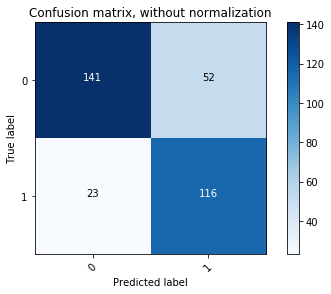

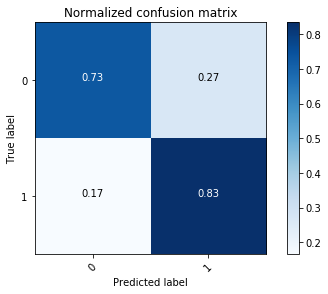

Wall time: 5.23 s


In [42]:
%%time
categories_count = CATEGORIES_COUNT

X_train = X_train_4_4
X_test = X_test_4_4

meta_net = Sequential()
meta_net.add(Dense(512, input_shape=X_train[0].shape))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(256))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(categories_count, activation='softmax'))
meta_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(meta_net.summary())
    
callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto')
history_callback = meta_net.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=300, batch_size=100, callbacks=[callback])

test_scores = meta_net.evaluate(X_test, y_test, verbose=0)
    
print("test accuracy:  %.4f" % test_scores[1])
print("")

y_train_pred = (meta_net.predict(X_train).round()).argmax(axis=1)
y_test_pred = (meta_net.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

# and than write results info files
file_path_train = "./Stacking_Results_France_ByMeaningLarge/meta_net_train_4_4_GLOVE_FR.npy"
file_path_test = "./Stacking_Results_France_ByMeaningLarge/meta_net_test_4_4_GLOVE_FR.npy"

np.save(file_path_train, y_train_pred)
np.save(file_path_test, y_test_pred)